In [0]:
import sys
folder = '/content/gdrive/My Drive/Colab Notebooks/my_project1/deep-learning/utils'
#sys.path.append(folder)
sys.path.insert(0, folder)

In [2]:
from google.colab import drive
ROOT = "/content/gdrive"
drive.mount(ROOT, force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
from torchvision import transforms
from helper import HelperModel
from dataset_info import DataSetInfo
from dataloader import DataLoader
from models.resnet import *
from transforms import Transform
from train import Train
from test import Test
from plot import Plot

In [4]:
model_obj = ResNet18()
# create object for Model
device = HelperModel.get_device()

model = model_obj.to(device)

#create object for helper with object
helper_obj = HelperModel(model_obj)

#display summaru of model
helper_obj.display_model_summay(model, (3, 32, 32))



----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128, 16, 16]          73,728
      BatchNorm2d-14          [-1, 128,

### Get data set object

In [0]:
data_set_obj = DataSetInfo("cifa", "./data")


### Get the train test transforms 

In [0]:
#Create Image Transform
# transform = transforms.Compose(
#     [transforms.ToTensor(),
#      transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

customised_transforms = [transforms.RandomCrop(32, padding=4),transforms.RandomHorizontalFlip(),transforms.ToTensor(),transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]
custom_transfoms = transforms.Compose(customised_transforms)

transform_obj = Transform(train_transforms=custom_transfoms, test_transforms=custom_transfoms)
train_transforms = transform_obj.train_transforms
test_transforms = transform_obj.test_transforms

### Get Train and Test data set

In [12]:
train_set = data_set_obj.get_train_dataset(train_transforms)
test_set = data_set_obj.get_test_dataset(test_transforms)

Files already downloaded and verified
Files already downloaded and verified


### Load the train and test data

In [14]:
data_loader_obj = DataLoader(train_set, test_set, batch_size=64)
train_loader = data_loader_obj.train_loader
test_loader = data_loader_obj.test_loader

CUDA Available? True


### Show some training images

plane dog deer deer


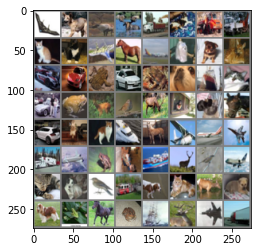

In [9]:
import torchvision
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
#get some random training images
iter_train_loader = iter(train_loader)
images, labels = iter_train_loader.next()
# show images
Plot.image_show(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%2s' % classes[labels[j]] for j in range(4)))

### Run the model

In [15]:
optimizer = helper_obj.get_l2_regularizer()
scheduler = helper_obj.get_one_cycle_lr(optimizer=optimizer, lr=0.001)
EPOCHS = 21
#l1_factor=0.0001

train_obj = Train()
test_obj = Test()
train_max_acc = []
train_min_loss = []
criterion = nn.CrossEntropyLoss()
for epoch in range(1, EPOCHS):
    print("EPOCH:", epoch)
    train_obj.train(model, device, train_loader, optimizer, criterion)
    scheduler.step()
    test_obj.test(model, device, test_loader, criterion, misclassfied_required=True)
    train_max_acc.append(train_obj.train_acc[-1])
    train_min_loss.append(train_obj.train_losses[-1])
miscassified_images = test_obj.misclassified_images
test_losses = test_obj.test_losses
test_acc = test_obj.test_acc
print("Maximum Training Accuracy = ", max(train_max_acc))
print("Maximum Testing Accuracy = ", max(test_acc))




  0%|          | 0/782 [00:00<?, ?it/s]

EPOCH: 1


Train Set: Train Loss=0.818086564540863 Batch_id=781 Accuracy=87.02: 100%|██████████| 782/782 [01:01<00:00, 12.81it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0061, Accuracy: 8688/10000 (86.88%)

EPOCH: 2


Train Set: Train Loss=0.2550732493400574 Batch_id=781 Accuracy=83.45: 100%|██████████| 782/782 [01:01<00:00, 12.66it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0090, Accuracy: 8065/10000 (80.65%)

EPOCH: 3


Train Set: Train Loss=0.42118582129478455 Batch_id=781 Accuracy=80.28: 100%|██████████| 782/782 [01:01<00:00, 12.65it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0109, Accuracy: 7650/10000 (76.50%)

EPOCH: 4


Train Set: Train Loss=0.7742301225662231 Batch_id=781 Accuracy=79.89: 100%|██████████| 782/782 [01:01<00:00, 12.67it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0107, Accuracy: 7688/10000 (76.88%)

EPOCH: 5


Train Set: Train Loss=0.8402540683746338 Batch_id=781 Accuracy=79.79: 100%|██████████| 782/782 [01:01<00:00, 12.69it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0110, Accuracy: 7654/10000 (76.54%)

EPOCH: 6


Train Set: Train Loss=0.5221973657608032 Batch_id=781 Accuracy=79.85: 100%|██████████| 782/782 [01:01<00:00, 12.68it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0123, Accuracy: 7413/10000 (74.13%)

EPOCH: 7


Train Set: Train Loss=0.6419865489006042 Batch_id=781 Accuracy=79.98: 100%|██████████| 782/782 [01:01<00:00, 12.67it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0204, Accuracy: 6370/10000 (63.70%)

EPOCH: 8


Train Set: Train Loss=0.9109979271888733 Batch_id=781 Accuracy=80.34: 100%|██████████| 782/782 [01:01<00:00, 12.70it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0139, Accuracy: 7078/10000 (70.78%)

EPOCH: 9


Train Set: Train Loss=1.0480284690856934 Batch_id=781 Accuracy=80.74: 100%|██████████| 782/782 [01:01<00:00, 12.66it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0140, Accuracy: 6960/10000 (69.60%)

EPOCH: 10


Train Set: Train Loss=0.6141084432601929 Batch_id=781 Accuracy=81.29: 100%|██████████| 782/782 [01:01<00:00, 12.71it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0154, Accuracy: 6797/10000 (67.97%)

EPOCH: 11


Train Set: Train Loss=0.5324207544326782 Batch_id=781 Accuracy=81.57: 100%|██████████| 782/782 [01:01<00:00, 12.66it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0123, Accuracy: 7266/10000 (72.66%)

EPOCH: 12


Train Set: Train Loss=0.6944374442100525 Batch_id=781 Accuracy=82.23: 100%|██████████| 782/782 [01:01<00:00, 12.68it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0117, Accuracy: 7611/10000 (76.11%)

EPOCH: 13


Train Set: Train Loss=0.72417151927948 Batch_id=781 Accuracy=82.92: 100%|██████████| 782/782 [01:01<00:00, 12.67it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0091, Accuracy: 8037/10000 (80.37%)

EPOCH: 14


Train Set: Train Loss=1.561706304550171 Batch_id=781 Accuracy=83.76: 100%|██████████| 782/782 [01:01<00:00, 12.69it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0085, Accuracy: 8205/10000 (82.05%)

EPOCH: 15


Train Set: Train Loss=0.44830018281936646 Batch_id=781 Accuracy=85.45: 100%|██████████| 782/782 [01:01<00:00, 12.66it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0083, Accuracy: 8203/10000 (82.03%)

EPOCH: 16


Train Set: Train Loss=0.32892686128616333 Batch_id=781 Accuracy=87.45: 100%|██████████| 782/782 [01:01<00:00, 12.69it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0079, Accuracy: 8321/10000 (83.21%)

EPOCH: 17


Train Set: Train Loss=0.5865430235862732 Batch_id=781 Accuracy=89.60: 100%|██████████| 782/782 [01:02<00:00, 12.61it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0063, Accuracy: 8647/10000 (86.47%)

EPOCH: 18


Train Set: Train Loss=0.37781715393066406 Batch_id=781 Accuracy=92.43: 100%|██████████| 782/782 [01:02<00:00, 12.58it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0045, Accuracy: 9023/10000 (90.23%)

EPOCH: 19


Train Set: Train Loss=0.7642277479171753 Batch_id=781 Accuracy=94.68: 100%|██████████| 782/782 [01:01<00:00, 12.67it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0037, Accuracy: 9229/10000 (92.29%)

EPOCH: 20


Train Set: Train Loss=0.07176829874515533 Batch_id=781 Accuracy=95.69: 100%|██████████| 782/782 [01:01<00:00, 12.67it/s]



Test set: Average loss: 0.0036, Accuracy: 9239/10000 (92.39%)

Maximum Training Accuracy =  95.69
Maximum Testing Accuracy =  92.39


### Display graphs

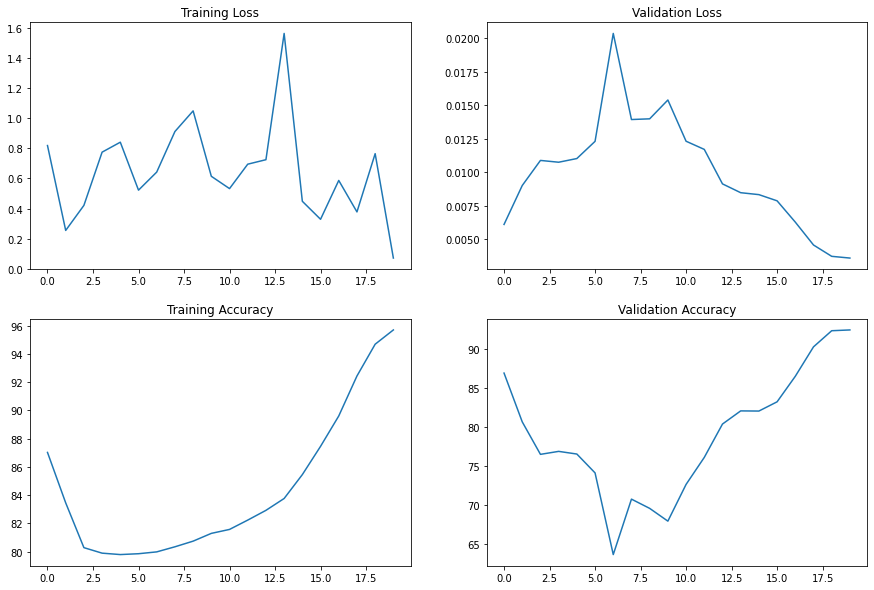

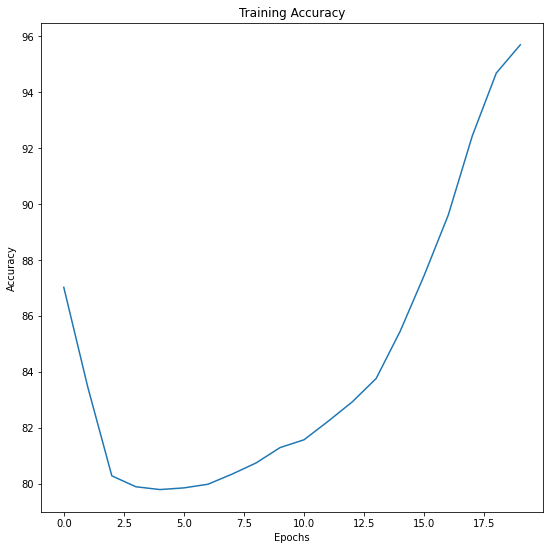

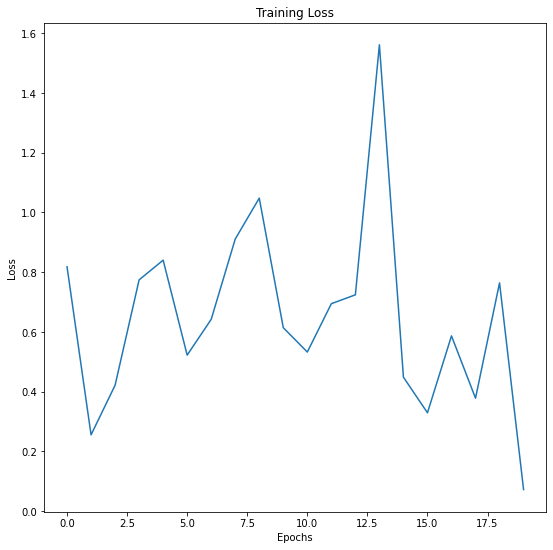

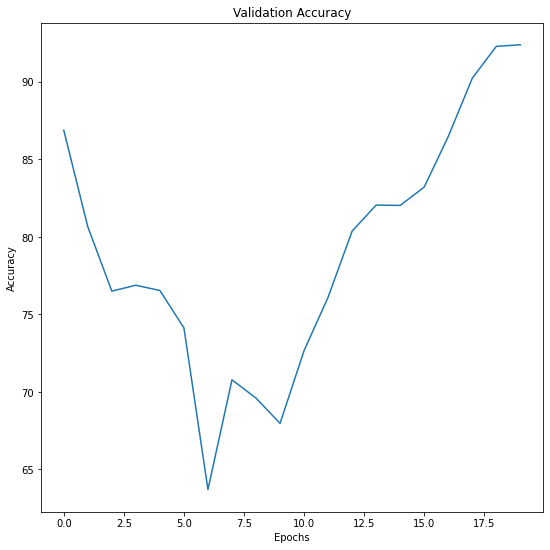

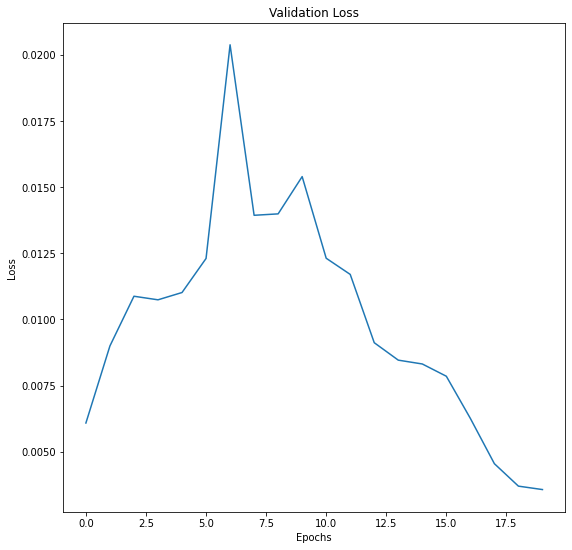

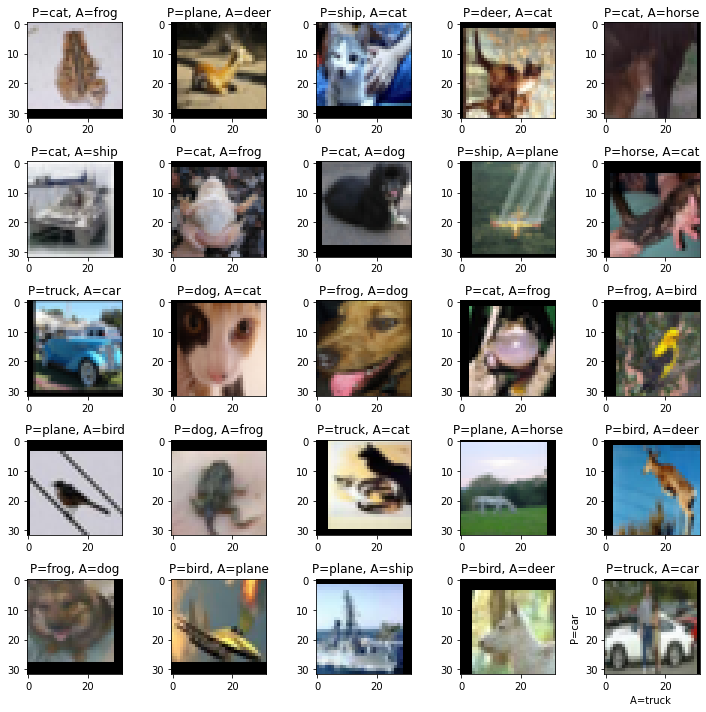

In [16]:
plt_obj = Plot(train_max_acc, train_min_loss, test_acc, test_losses)
# Plot all graph
plt_obj.display_all_plot()
#plot train accuracy graph
plt_obj.plot_train_graph()
#plot train loss graph
plt_obj.plot_train_graph(plot_case="Loss")
#plot validation accuracy graph
plt_obj.plot_validation_graph()
#plot validation loss graph
plt_obj.plot_validation_graph(plot_case="Loss")
#plot 25 misclassified images
Plot.plot_cifar_misclassified_images(miscassified_images)